# Reuters Multiclass Classification Example

This example describes how to do a multiclass classfication with the reuters dataset

Import the reuters training and test datasets from `keras.datasets`

As with the IMDB example we will stick with the top 10,000 words

In [10]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [11]:
len(train_data)
len(test_data)

2246

In [13]:
train_labels[0]

3

### Data Transformation
Vectorize train and test data before inputting them to the models. You should also hot encode them.


In [14]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

One hot encode the labels 

In [15]:
def to_one_hot(labels, dimension=46):
    results=np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
    

In [16]:
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Alternatively you can the keras built in way via `to_categorical`

In [17]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Model Building & Compiling
Since this classification deals with a higher dimensionality classiifcation. 46 mutually exclusive classification instead of 2 mutually exclusive classification. We can try to build the model with 64 dimension Intermediate layers ( _instead of 16 used in the IMDB classification poroblem_ )

In [36]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The last layer uses a softmax activation. It means the network will output a probability distribution over the 46 different output classes—for every input sample, the network will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

Compiling the model

In [37]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Creating a validation set



In [38]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training

In [39]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
         validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 83us/step - loss: 2.5647 - accuracy: 0.5329 - val_loss: 1.6811 - val_accuracy: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 67us/step - loss: 1.4009 - accuracy: 0.6969 - val_loss: 1.3189 - val_accuracy: 0.7000
Epoch 3/20
7982/7982 [==============================] - 1s 69us/step - loss: 1.0660 - accuracy: 0.7615 - val_loss: 1.1636 - val_accuracy: 0.7450
Epoch 4/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.8428 - accuracy: 0.8161 - val_loss: 1.0471 - val_accuracy: 0.7790
Epoch 5/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.6724 - accuracy: 0.8572 - val_loss: 0.9720 - val_accuracy: 0.7960
Epoch 6/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.5409 - accuracy: 0.8861 - val_loss: 0.9455 - val_accuracy: 0.8010
Epoch 7/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.43

### Graphing

Training and validation loss graph

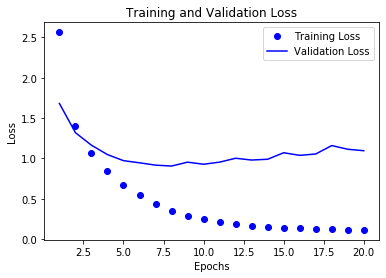

In [40]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) #number of epochs +1 for graph

#print("loss_values:" , loss_values)
#print("val_loss:" , val_loss)
#print("epochs:" , epochs)


plt.plot(epochs,loss_values, 'bo', label = "Training Loss") # 'bo' == blue dot for training loss
plt.plot(epochs,val_loss, 'b', label = "Validation Loss" ) # 'b' == blue line for validation loss
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


Training and validation accuracy

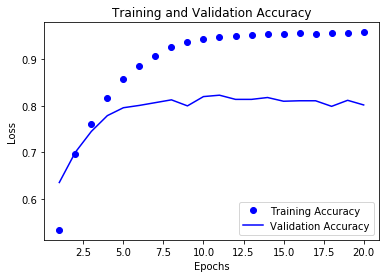

In [41]:
import matplotlib.pyplot as plt
history_dict=history.history
accuracy_values = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1) #number of epochs +1 for graph

#print("loss_values:" , loss_values)
#print("val_loss:" , val_loss)
#print("epochs:" , epochs)


plt.plot(epochs,accuracy_values, 'bo', label = "Training Accuracy") # 'bo' == blue dot for training accuracy
plt.plot(epochs,val_accuracy, 'b', label = "Validation Accuracy" ) # 'b' == blue line for validation accuracy
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


### Retraining with 9 epochs

In [44]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])



model.fit(partial_x_train,
                 partial_y_train,
                 epochs=9,
                 batch_size=512,
         validation_data=(x_val,y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 76us/step - loss: 2.6411 - accuracy: 0.4878 - val_loss: 1.7110 - val_accuracy: 0.6470
Epoch 2/9
7982/7982 [==============================] - 1s 66us/step - loss: 1.3846 - accuracy: 0.7114 - val_loss: 1.2820 - val_accuracy: 0.7220
Epoch 3/9
7982/7982 [==============================] - 1s 67us/step - loss: 1.0162 - accuracy: 0.7834 - val_loss: 1.1409 - val_accuracy: 0.7430
Epoch 4/9
7982/7982 [==============================] - 1s 63us/step - loss: 0.7922 - accuracy: 0.8314 - val_loss: 1.0064 - val_accuracy: 0.7850
Epoch 5/9
7982/7982 [==============================] - 1s 68us/step - loss: 0.6296 - accuracy: 0.8690 - val_loss: 0.9502 - val_accuracy: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.5054 - accuracy: 0.8958 - val_loss: 0.9100 - val_accuracy: 0.8070
Epoch 7/9
7982/7982 [==============================] - 1s 67us/step - loss: 0.4029 - acc

In [45]:
results

[0.9945510006969992, 0.7916295528411865]

### Predictions 



In [48]:
predictions = model.predict(x_test)

Each entry in Predictions is a vector of 46

In [49]:
predictions[0].shape

(46,)

The cooefficients in the vector sum to 1.0

In [50]:
np.sum(predictions[0])

1.0

The largest entry is the predicted class - the class with the highest probability 

In [52]:
np.argmax(predictions[0])

3